In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from itertools import groupby
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
CAPUCHIN_FILE = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips','XC3776-3.wav')
NOT_CAPUCHIN_FILE= os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [3]:
bird1 = '/kaggle/input/birdsong-recognition/train_audio/aldfly/XC135454.mp3'
bird2 = '/kaggle/input/birdsong-recognition/train_audio/amecro/XC112598.mp3'
#bird2 = os.path.join('/kaggle/input','birdsong-recognition','train_audio/amecro','XC112598.mp3')

In [4]:
# CAPUCHIN_FILE

In [5]:
def load_wav_16k_mono(filename):
    file_contents=tf.io.read_file(filename)
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)
    wav=tf.squeeze(wav,axis=-1)
    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

In [6]:
wave=load_wav_16k_mono(CAPUCHIN_FILE)
nwave=load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [7]:
# import required modules mp3 to wav
from os import path
from pydub import AudioSegment
  
# assign files
input_file1 = '/kaggle/input/birdsong-recognition/train_audio/aldfly/XC135454.mp3'
output_file1 = "result1.wav"
input_file = '/kaggle/input/birdsong-recognition/train_audio/amecro/XC112598.mp3'
output_file = "result.wav"
# convert mp3 file to wav file
sound1 = AudioSegment.from_mp3(input_file1)
sound1.export(output_file1, format="wav")
sound = AudioSegment.from_mp3(input_file)
sound.export(output_file, format="wav")

<_io.BufferedRandom name='result.wav'>

In [8]:
import os
birds=["amecro","carwre","fiespa","foxspa","pinjay"]
path = "/kaggle/working/"
for i in birds:
    if not os.path.isdir(path+i):
        os.mkdir(path+i)

In [9]:
# import required modules
import os
from os import path
from pydub import AudioSegment
input_file = "/kaggle/input/birdsong-recognition/train_audio/"
output = "/kaggle/working/"
# assign files
birds=["amecro","carwre","fiespa","foxspa","pinjay"]
for i in birds:
    for k in os.listdir(input_file+i):
        output_file = os.path.join(output+i,k.split(".")[0]+".wav")
        input_f =  os.path.join(input_file+i,k)
        # convert mp3 file to wav file
        sound = AudioSegment.from_mp3(input_f)
        sound.export(output_file, format="wav")

In [10]:
b1=load_wav_16k_mono("/kaggle/working/result1.wav")
b2=load_wav_16k_mono("/kaggle/working/result.wav")

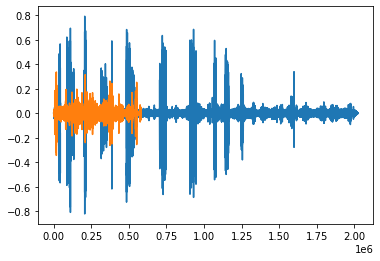

In [11]:
plt.plot(b2)
plt.plot(b1)
plt.show()

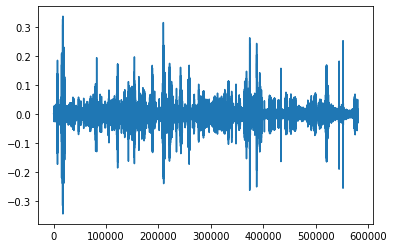

In [12]:
plt.plot(b1)
plt.show()

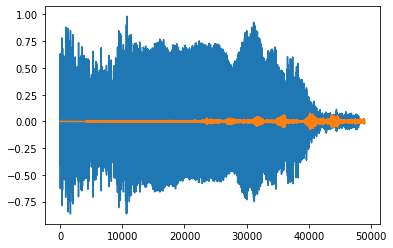

In [13]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [14]:
# POSITIVE=os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips')
# NEGATIVE=os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips')

In [15]:
bird1=os.path.join('/kaggle/working','pinjay')
bird2=os.path.join('/kaggle/working','amecro')
bird3=os.path.join('/kaggle/working','carwre')
bird4=os.path.join('/kaggle/working','fiespa')
bird5=os.path.join('/kaggle/working','foxspa')

In [16]:
b1=tf.data.Dataset.list_files(bird1+'/*.wav')
b2=tf.data.Dataset.list_files(bird2+'/*.wav')
b3=tf.data.Dataset.list_files(bird3+'/*.wav')
b4=tf.data.Dataset.list_files(bird4+'/*.wav')
b5=tf.data.Dataset.list_files(bird5+'/*.wav')


In [17]:
# b11= tf.data.Dataset.zip((b1,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([0 for i in range(len(b1))])))))
# b21= tf.data.Dataset.zip((b2,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([1 for i in range(len(b2))])))))
# b31= tf.data.Dataset.zip((b3,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([2 for i in range(len(b3))])))))
# b41= tf.data.Dataset.zip((b4,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([3 for i in range(len(b4))])))))
# b51= tf.data.Dataset.zip((b5,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([4 for i in range(len(b5))])))))

In [18]:
b11= tf.data.Dataset.zip((b1,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([[1,0,0,0,0] for i in range(len(b1))])))))
b21= tf.data.Dataset.zip((b2,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([[0,1,0,0,0] for i in range(len(b2))])))))
b31= tf.data.Dataset.zip((b3,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([[0,0,1,0,0] for i in range(len(b3))])))))
b41= tf.data.Dataset.zip((b4,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([[0,0,0,1,0] for i in range(len(b4))])))))
b51= tf.data.Dataset.zip((b5,tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(np.array([[0,0,0,0,1] for i in range(len(b5))])))))

In [19]:
data=(((b11.concatenate(b21)).concatenate(b31)).concatenate(b41)).concatenate(b51)


In [20]:
for i in data:
    print(i)
    break

(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/working/pinjay/XC227470.wav'>, <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 0, 0, 0, 0])>)


In [21]:
len(data)

451

In [22]:
# pos.as_numpy_iterator().next()

In [23]:
# a=tf.ones(len(neg))

In [24]:
#  positives=tf.data.Dataset.zip((pos,tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
# # positives=tf.data.Dataset.zip((pos,tf.data.Dataset.from_tensor_slices(1)))
# negatives=tf.data.Dataset.zip((neg,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
# data=positives.concatenate(negatives)

In [25]:
# len(positives)

In [26]:
# lengths=[]
# for file in os.listdir(bird1):
#     tensor_wave=load_wav_16k_mono(os.path.join(bird1,file))
#     print(tensor_wave)
#     lengths.append(len(tensor_wave))

In [27]:
# lengths=[]
# for file in os.listdir(os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips')):
#     print(file)
#     tensor_wave=load_wav_16k_mono(os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips',file))
#     lengths.append(len(tensor_wave))

In [28]:
def preprocess(file_path,label):
    wav=load_wav_16k_mono(file_path)
    wav=wav[:48000]
    zero_padding=tf.zeros([48000]-tf.shape(wav),dtype=tf.float32)
    wav=tf.concat([zero_padding,wav],0)
    spectrogram=tf.signal.stft(wav,frame_length=320,frame_step=32)
    spectrogram=tf.abs(spectrogram)
    spectrogram=tf.expand_dims(spectrogram,axis=2)
    return spectrogram,label

In [29]:
filepath,label=b11.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [30]:
spectrogram,label=preprocess(filepath,label)

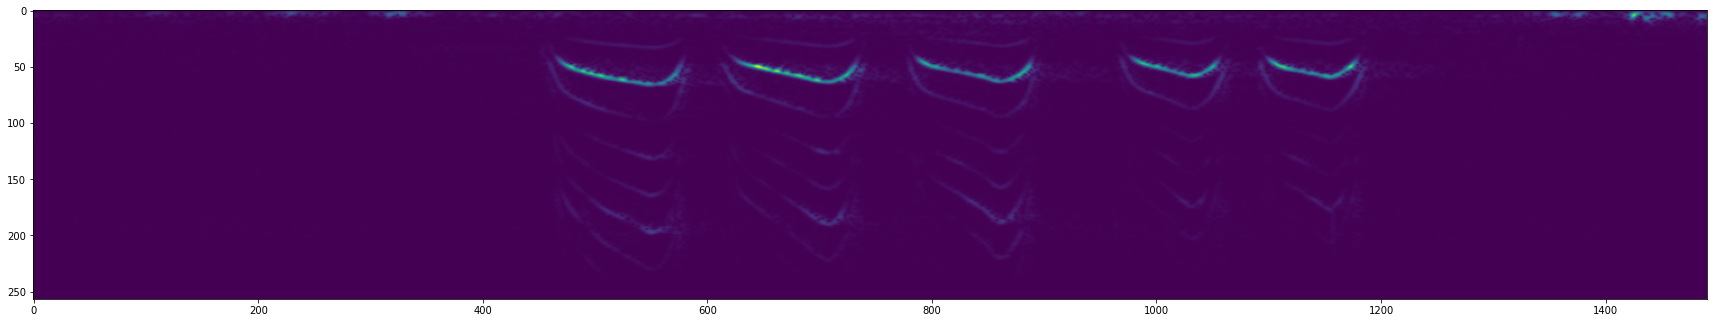

In [31]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [32]:
data.as_numpy_iterator().next()

(b'/kaggle/working/pinjay/XC256783.wav', array([1, 0, 0, 0, 0]))

In [33]:
data=data.map(preprocess)
data=data.cache()
data=data.shuffle(buffer_size=1000)
data=data.batch(8)
data=data.prefetch(4)

In [34]:
len(data)

57

In [35]:
# for i in data:
#     print(i)

In [36]:
train=data.take(39)
test=data.skip(39).take(18)

In [37]:
samples,labels=train.as_numpy_iterator().next()
samples.shape

(8, 1491, 257, 1)

In [38]:
model=Sequential()
model.add(Conv2D(8,(3,3),activation='relu',input_shape=(1491,257,1)))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [39]:
model.compile(optimizer ='Adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1489, 255, 8)      80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1487, 253, 8)      584       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1485, 251, 8)      584       
_________________________________________________________________
flatten (Flatten)            (None, 2981880)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               381680768 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 381,682,661
Trainable params: 381,682,661
Non-trainable params: 0
__________________________________________

In [41]:
hist=model.fit(train,epochs=30,validation_data=test)

Epoch 1/30
39/39 [==============================] - 15s 201ms/step - loss: 3.9025 - accuracy: 0.0179 - recall: 0.7628 - precision: 0.3005 - val_loss: 0.8184 - val_accuracy: 0.0086 - val_recall: 0.9353 - val_precision: 0.3801
Epoch 2/30
39/39 [==============================] - 7s 187ms/step - loss: 0.8162 - accuracy: 0.0147 - recall: 0.9199 - precision: 0.3638 - val_loss: 0.6248 - val_accuracy: 0.0331 - val_recall: 0.9640 - val_precision: 0.4161
Epoch 3/30
39/39 [==============================] - 7s 185ms/step - loss: 0.5480 - accuracy: 0.0481 - recall: 0.9615 - precision: 0.3958 - val_loss: 0.4388 - val_accuracy: 0.0619 - val_recall: 0.9928 - val_precision: 0.4207
Epoch 4/30
39/39 [==============================] - 7s 185ms/step - loss: 0.4471 - accuracy: 0.0609 - recall: 0.9808 - precision: 0.4215 - val_loss: 0.3051 - val_accuracy: 0.0532 - val_recall: 0.9856 - val_precision: 0.4448
Epoch 5/30
39/39 [==============================] - 7s 189ms/step - loss: 0.3175 - accuracy: 0.0500 - r

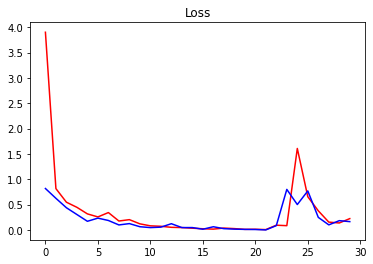

In [42]:
plt.title('Loss')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.show()

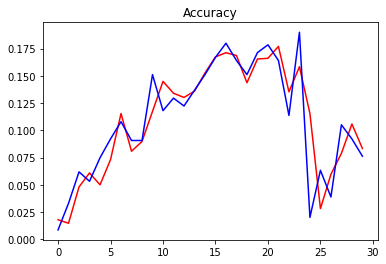

In [43]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.show()

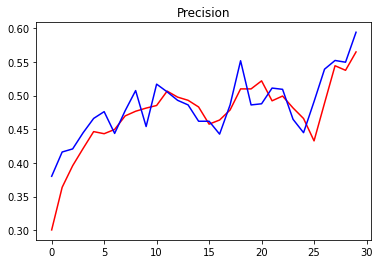

In [44]:
plt.title('Precision')
plt.plot(hist.history['precision'],'r')
plt.plot(hist.history['val_precision'],'b')
plt.show()

In [45]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

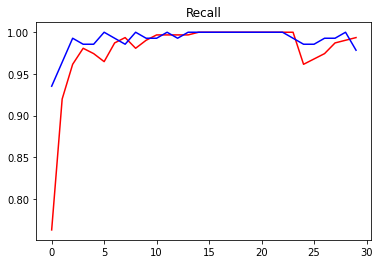

In [46]:
plt.title('Recall')
plt.plot(hist.history['recall'],'r')
plt.plot(hist.history['val_recall'],'b')
plt.show()

In [47]:
X_test,y_test=test.as_numpy_iterator().next()

In [48]:
X_test

array([[[[2.35422340e-06],
         [3.75653849e-06],
         [6.14623377e-06],
         ...,
         [2.91111721e-08],
         [1.22458044e-08],
         [6.65431799e-09]],

        [[8.89137300e-06],
         [1.23987329e-05],
         [1.86309353e-05],
         ...,
         [6.26323313e-08],
         [2.46880418e-08],
         [6.13908924e-11]],

        [[3.01728360e-05],
         [3.36559460e-05],
         [4.09474233e-05],
         ...,
         [1.43480122e-07],
         [9.42980307e-08],
         [7.63766366e-08]],

        ...,

        [[2.27236003e-03],
         [2.05368549e-02],
         [7.92085081e-02],
         ...,
         [1.13912429e-04],
         [6.68674620e-05],
         [3.54722142e-05]],

        [[4.81879711e-03],
         [2.97364965e-02],
         [7.45868608e-02],
         ...,
         [9.76152951e-05],
         [8.44536698e-05],
         [6.30915165e-05]],

        [[1.88113004e-02],
         [3.48473415e-02],
         [5.14420569e-02],
         ...,
 

In [49]:
y_test

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [50]:
y_hat=model.predict(X_test)

In [51]:
test_list = []
for x in y_hat : 
    temp = list(x)
    ind = temp.index(max(temp))
    test_list.append([0 if i!=ind else 1 for i in range(5)])
print(test_list)
    

[[1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


In [52]:
# y_hat=[1 if prediction>0.5 else 0 for prediction in y_hat]

In [53]:
def load_mp3_16k_mono(filename):
    res=tfio.audio.AudioIOTensor(filename)
    tensor=res.to_tensor()
    tensor=tf.math.reduce_sum(tensor,axis=1)/2
    sample_rate=res.rate
    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    wav=tfio.audio.resample(tensor,rate_in=sample_rate,rate_out=16000)
    return wav

In [54]:
mp3=os.path.join('/kaggle/input','birdsong-recognition','example_test_audio', 'BLKFR-10-CPL_20190611_093000.pt540.mp3')
wav=load_mp3_16k_mono(mp3)
audio_slices=tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length=48000,sequence_stride=48000,batch_size=1)
samples,index=audio_slices.as_numpy_iterator().next()

In [55]:
def preprocess_mp3(sample,index):
    sample=sample[0]
    zero_padding=tf.zeros([48000]-tf.shape(sample),dtype=tf.float32)
    wav=tf.concat([zero_padding,sample],0)
    spectrogram=tf.signal.stft(wav,frame_length=320,frame_step=32)
    spectrogram=tf.abs(spectrogram)
    spectrogram=tf.expand_dims(spectrogram,axis=2)
    return spectrogram

In [56]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [57]:
yhat = model.predict(audio_slices)
# yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

In [58]:
test_list = []
for x in yhat : 
    temp = list(x)
    ind = temp.index(max(temp))
    test_list.append([0 if i!=ind else 1 for i in range(5)])
print(test_list)

[[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 

In [59]:
len(test_list)

156

In [60]:
y_hat=[key for key,group in groupby(test_list)]
# calls=tf.math.reduce_sum(y_hat).numpy()

In [61]:
# y_hat
print(len(y_hat))

3


In [62]:
dic = {}
for x in y_hat :
    if tuple(x) in dic :
        dic[tuple(x)] += 1
    else:
        dic[tuple(x)] = 1

In [63]:
dic

{(1, 0, 0, 0, 0): 2, (0, 1, 0, 0, 0): 1}

In [64]:
# results={}
# for file in os.listdir(os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Forest Recordings')):
#     FILEPATH=os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Forest Recordings',file)
#     wav=load_mp3_16k_mono(FILEPATH)
#     audio_slices=tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length=48000,sequence_stride=48000,batch_size=1)
#     audio_slices=audio_slices.map(preprocess_mp3)
#     audio_slices=audio_slices.batch(64)
#     y_hat=model.predict(audio_slices)
#     results[file]=y_hat

In [65]:
results={}
for file in os.listdir(os.path.join('/kaggle/input','birdsong-recognition','example_test_audio')):
    FILEPATH=os.path.join('/kaggle/input','birdsong-recognition','example_test_audio',file)
    wav=load_mp3_16k_mono(FILEPATH)
    audio_slices=tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length=48000,sequence_stride=48000,batch_size=1)
    audio_slices=audio_slices.map(preprocess_mp3)
    audio_slices=audio_slices.batch(64)
    y_hat=model.predict(audio_slices)
    results[file]=y_hat

In [66]:
results

{'ORANGE-7-CAP_20190606_093000.pt623.mp3': array([[0.75583917, 0.29581127, 0.28933626, 0.0775661 , 0.10893357],
        [0.88509816, 0.48072648, 0.21842413, 0.01883302, 0.10827941],
        [0.9187397 , 0.6078308 , 0.14774573, 0.02024179, 0.0994284 ],
        [0.8605207 , 0.5362553 , 0.35269645, 0.01554784, 0.07241192],
        [0.66262746, 0.34906435, 0.12740143, 0.3262736 , 0.11959174],
        [0.85123676, 0.3505456 , 0.38539997, 0.01809046, 0.08283719],
        [0.8351524 , 0.2475611 , 0.385522  , 0.05113216, 0.07169048],
        [0.8407965 , 0.32668385, 0.27896935, 0.04748702, 0.10728649],
        [0.7704372 , 0.31314343, 0.34149313, 0.309435  , 0.11585927],
        [0.9019246 , 0.43385214, 0.16034576, 0.04504899, 0.10512576],
        [0.792685  , 0.1729158 , 0.23555732, 0.12734868, 0.12898263],
        [0.87984437, 0.46096826, 0.13839282, 0.06247807, 0.11273947],
        [0.9062831 , 0.5189991 , 0.25120535, 0.02059069, 0.08301563],
        [0.78752023, 0.24762915, 0.2856573 , 0.0

In [67]:
# class_preds={}
# for file,logits in results.items():
#     class_preds[file]=[1 if prediction>0.99 else 0 for prediction in logits]
# #class_preds

In [68]:
class_preds={}
for file,logits in results.items():
    test_list1 = []
    for x in logits : 
        temp = list(x)
        ind = temp.index(max(temp))
        test_list1.append([0 if i!=ind else 1 for i in range(5)])
    class_preds[file]=test_list1
#class_preds



In [69]:
class_preds

{'ORANGE-7-CAP_20190606_093000.pt623.mp3': [[1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0,

In [70]:
bird_name = {(1,0,0,0,0) : "Pinjay", (0,1,0,0,0) : "Amecro" , (0,0,1,0,0) : "Crawre" ,(0,0,0,1,0) : "Fiespa" ,(0,0,0,0,1) : "Foxspa"}

In [71]:
postprocessed={}
for file,scores in class_preds.items():
    postprocessed[file]=tf.math.reduce_sum([key for key,group in groupby(scores)]).numpy()
#postprocessed

In [72]:
bird_pred={}

for file,scores in class_preds.items():
    record = [key for key,group in groupby(scores)]
    d = {}
    for l in record :
        
        if bird_name[tuple(l)] in d :
            d[bird_name[tuple(l)]] += 1
        else:
            d[bird_name[tuple(l)]] = 1 
    bird_pred[file] = d

In [73]:
bird_pred

{'ORANGE-7-CAP_20190606_093000.pt623.mp3': {'Pinjay': 6,
  'Amecro': 6,
  'Foxspa': 1},
 'BLKFR-10-CPL_20190611_093000.pt540.mp3': {'Pinjay': 2, 'Amecro': 1}}

In [74]:
import csv
with open('submission.csv','w',newline='')as f:
    writer=csv.writer(f,delimiter=',')
    writer.writerow(['clip_name','call_count'])
    for key, value in bird_pred.items():
        writer.writerow([key,value])